# Profitability Analysis of Real Estates in NYC

### ------------------------------------------------------------------------------------------------------------------------------------------------------------

### Harish Siva Subramanian

### Email: hsivasub@asu.edu  or  sharish2395@gmail.com

### Mobile: (480)-494-7314

### -----------------------------------------------------------------------------------------------------------------------------------------------------------

## Problem Statement

 As a part of this assignment, a data product was built to assist a real estate company to understand which zip codes are profitable for short term rentals within New York City. They have already decided to invest in Two Bedroom houses as they are found to be profitable. For this purpose, publicly available data from Zillow and AirBnB were used.

### Zillow Data-  Contains the Time Series cost data for 2 Bedroom Apartment for different Zipcodes

### Airbnb Data- Information on the listing including location, and other relevant short term rental informations

## Assumptions

1.The investor will pay for the property in cash (i.e. no mortgage/interest rate will need to be accounted for).

 
2.The time value of money discount rate is 0% (i.e 1 dollar today is worth the same 100 years from now).


3.All properties and all square feet within each locale can be assumed to be homogeneous (i.e. a 1000 square foot property in a locale such as Bronx or Manhattan generates twice the revenue and costs twice as much as any other 500 square foot property within that same locale).


4.The occupancy rate is assumed to be 75%.


5.It was assumed that the real estate company wants to buy the property in April 2019, so I had performed time series forecasting to obtain the value of property in April 2019 considering the data from January 2010.


6.Since the data before January 2010 were showing abnormal pattern and also since most of them had missing values, the data from January 2010 were used.


7.Availability for 90 days was considered during the availability analysis oowing to the fact availability for 365 days were incorrect for some zipcodes.


8.Time for calculating the Breakeven Period was taken as 365 days(neglecting leap year) and thus the resultant Breakeven Period will be in years.


9.While performing time series analysis, models were not built step by step for each zipcodes because of obvious time constraints and considering the scope of the project. Thus AutoARIMA was used to do Model fitting and forecasting for all the individual zipcodes.


### Quality Check

The project addressed the following quality checks,


•	Checking for Duplicates

•	Checking for Negative values

•	Checking the Columns with Null Values 

### Data Munging

The project addressed the following quality checks,

•	Cleaning up the Zillow Dataset.

•	Cleaning up the Airbnb dataset.

•	Imputing the missing values with group mean.

•	Imputing some of the 0 values with the group mean.

•	Filtering the Airbnb dataset for New York and 2 Bedrooms apartment.

•	Grouping the Airbnb data by zipcode and taking mean.

•	Joining the cleaned final Airbnb and Zillow dataset based on matching Zipcodes.


### Additional KPIs added

•	Current Month Cost-April 2019(Calculated from Time series Forecasting).  Also the cost for other months preceding Current Month were also added but they were not used anywhere.

•	Neighbourhood group cleansed(Extracted from Airbnb data to add to final dataframe).

•	Expected Revenue(Calulated Field).

•	Breakeven Period(Calculated Field).


### Time Series Analysis

Here the Zillow dataset contains the Time series of cost data and the data from January 2010 was taken to fit the Time series model and forecast the cost values upto the Current Month Cost which is April 2019 for all the 21 Zipcodes.
Here for this purpose the Pyamid ARIMA package was used to perform the AutoARIMA and get the forecast values.


### Visual Analysis:

The following plots and analysis was carried out in this project,

•	Visualizing the Zipcodes in Real Time.

•	Preliminary Review Analysis:

    Review Accuracy vs Reviews Ratings

    Reviews Ratings Vs No of Reviews Vs Neighbourhood

•	Analysis of Availability:

    Bar plots of Availability for all Zipcodes
    
    Availability- Revenue Analysis
    
    Availability- Cost Analysis
    
•	Correlation between Revenue, Cost, Reviews and Availability

•	Distribution of Revenue and Cost

    Violin Plot of Revenue
    
    Violin Plot of Cost
    
•	Revenue-Cost Analysis

•	Break Even Analysis

•	3-D Scatter Plot Between Revenue, Cost and Breakeven period


In [1]:

#Importing the Libraries

import pandas as pd                
import numpy as np                   

# Matplotlib is for plotting graphs
import matplotlib.pyplot as plt    
# matplotlib inline will display the graphs right below the cell
%matplotlib inline                 

# Plotly is used for Interactive Visualization
import plotly.plotly as py         
from plotly.offline import init_notebook_mode, iplot         
init_notebook_mode(connected=True)                           
import plotly.graph_objs as go   



In [2]:
# Importing the Respective Datasets

airbnb = pd.read_csv("listings.csv")
zillow = pd.read_csv("Zip_Zhvi_2bedroom.csv")

C:\Users\shari\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning:

Columns (43,88) have mixed types. Specify dtype option on import or set low_memory=False.



In [3]:
airbnb.shape

(40753, 95)

In [4]:
zillow.shape

(8946, 262)

## Quality Check- Phase I

#### Since there are many columns in these datasets, I have created a function to display all the columns as a list. This helps us to see all the columns in the Jupyter Notebook

In [5]:
# Function to return all the Columns in a List Format:

def cols(dataset):
    return(dataset.columns.tolist())

In [6]:
cols(airbnb)

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',


In [7]:
cols(zillow)

['RegionID',
 'RegionName',
 'City',
 'State',
 'Metro',
 'CountyName',
 'SizeRank',
 '1996-04',
 '1996-05',
 '1996-06',
 '1996-07',
 '1996-08',
 '1996-09',
 '1996-10',
 '1996-11',
 '1996-12',
 '1997-01',
 '1997-02',
 '1997-03',
 '1997-04',
 '1997-05',
 '1997-06',
 '1997-07',
 '1997-08',
 '1997-09',
 '1997-10',
 '1997-11',
 '1997-12',
 '1998-01',
 '1998-02',
 '1998-03',
 '1998-04',
 '1998-05',
 '1998-06',
 '1998-07',
 '1998-08',
 '1998-09',
 '1998-10',
 '1998-11',
 '1998-12',
 '1999-01',
 '1999-02',
 '1999-03',
 '1999-04',
 '1999-05',
 '1999-06',
 '1999-07',
 '1999-08',
 '1999-09',
 '1999-10',
 '1999-11',
 '1999-12',
 '2000-01',
 '2000-02',
 '2000-03',
 '2000-04',
 '2000-05',
 '2000-06',
 '2000-07',
 '2000-08',
 '2000-09',
 '2000-10',
 '2000-11',
 '2000-12',
 '2001-01',
 '2001-02',
 '2001-03',
 '2001-04',
 '2001-05',
 '2001-06',
 '2001-07',
 '2001-08',
 '2001-09',
 '2001-10',
 '2001-11',
 '2001-12',
 '2002-01',
 '2002-02',
 '2002-03',
 '2002-04',
 '2002-05',
 '2002-06',
 '2002-07',
 '2

In [8]:
# Function to determine the Missing Value Percent in every Column of a Dataset

def mis_value_percent(dataset):
    return(100* dataset.isnull().sum()/ len(dataset))

In [9]:
mis_value_percent(zillow)

RegionID       0.000000
RegionName     0.000000
City           0.000000
State          0.000000
Metro          2.794545
CountyName     0.000000
SizeRank       0.000000
1996-04       29.756316
1996-05       28.862061
1996-06       28.862061
1996-07       28.806170
1996-08       28.794992
1996-09       28.794992
1996-10       28.794992
1996-11       28.683210
1996-12       28.683210
1997-01       28.414934
1997-02       23.619495
1997-03       23.395931
1997-04       23.395931
1997-05       23.395931
1997-06       23.373575
1997-07       23.373575
1997-08       22.289291
1997-09       22.255757
1997-10       22.255757
1997-11       22.222222
1997-12       22.177510
1998-01       21.987480
1998-02       20.366644
                ...    
2015-01        0.000000
2015-02        0.000000
2015-03        0.000000
2015-04        0.000000
2015-05        0.000000
2015-06        0.000000
2015-07        0.000000
2015-08        0.000000
2015-09        0.000000
2015-10        0.000000
2015-11        0

#### Most of the Missing values in zillow data are associated with the time series data which I had later neglected the missing columns alone while performing time series analysis for that.

### Checking for Duplicates

In [10]:
airbnb.shape

(40753, 95)

In [11]:
airbnb.drop_duplicates().shape

(40753, 95)

No duplicates are found in AirBnB data as the dimensions didn't change

In [12]:
zillow.shape

(8946, 262)

In [13]:
zillow.drop_duplicates().shape

(8946, 262)

Similarly no duplicate rows are found in Zillow dataset

### Check for Negative Values

In [14]:
airbnb[(airbnb < 0).all(1)]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month


In [15]:
zillow[(zillow < 0).all(1)]

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06


No negative values are found in both the dataframes

## Data Munging

In [16]:
zillow.City.unique()

array(['New York', 'Chicago', 'El Paso', ..., "Hart'S Location",
       'Waterville Valley', 'Shelburne Falls'], dtype=object)

In [17]:
zillow.RegionName

0       10025
1       60657
2       10023
3       60614
4       79936
5       60640
6       94109
7       77494
8       32162
9       60647
10      37211
11      37013
12      60618
13      10128
14      10011
15      28269
16      77573
17      30349
18      90046
19      77584
20      10003
21      60613
22      78660
23      75052
24      20009
25      20002
26      21234
27      63376
28      30044
29      60629
        ...  
8916    47640
8917    92333
8918     3605
8919    47968
8920    47597
8921    80515
8922     3282
8923    55781
8924    96148
8925     3457
8926    80456
8927    80510
8928     1255
8929    95497
8930    55053
8931    95728
8932    97149
8933     3279
8934    12480
8935    80481
8936     1270
8937     3812
8938     3215
8939    47965
8940     3765
8941    80532
8942    12429
8943    97028
8944     1338
8945     3293
Name: RegionName, Length: 8946, dtype: int64

In [18]:
# Cleaning the Zillow Data:

def zillow_clean(dataset, city_of_interest):
    
    #Filtering Out the City Based on the Requirement
    dataset=dataset[dataset.City==city_of_interest]
    
    # Renaming the Column Name "RegionName" to "zipcode"
    dataset.rename(columns= {"RegionName": "zipcode"}, inplace= True)
    
    # Converting the zipcode column to integer format
    dataset['zipcode']= dataset['zipcode'].astype(int)
    return dataset

In [19]:
# Using the Function and Storing it as zillow

zillow=zillow_clean(zillow, "New York")

C:\Users\shari\Anaconda3\lib\site-packages\pandas\core\frame.py:2746: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\shari\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [20]:
zillow.shape

(25, 262)

In [21]:
mis_value_percent(airbnb)

id                                    0.000000
listing_url                           0.000000
scrape_id                             0.000000
last_scraped                          0.000000
name                                  0.085883
summary                               3.962898
space                                31.585405
description                           0.046622
experiences_offered                   0.000000
neighborhood_overview                42.018992
notes                                64.157240
transit                              37.526072
access                               42.136775
interaction                          44.845778
house_rules                          36.399774
thumbnail_url                        21.142002
medium_url                           21.142002
picture_url                           0.000000
xl_picture_url                       21.142002
host_id                               0.000000
host_url                              0.000000
host_name    

In [22]:
airbnb.shape

(40753, 95)

In [23]:
# Function to clean up the Airbnb Dataset and Filter it based on the Number of Bedrooms

def airbnb_clean(dataset, number_of_bedrooms):
    
    
    # Remove the Dollar Sign in the Price Column
    dataset['price']=dataset['price'].replace( '[\$,)]','', regex=True ).astype(float)
    
    # Some rows have their postal code along with the zip code and we will be needing only the Zipcode(5 numbers alone)
    dataset['zipcode']= dataset['zipcode'].str[:5]
    
    # Removing the Nan values from Zipcodes
    dataset['zipcode'] = pd.to_numeric(dataset['zipcode'], errors='coerce')
    dataset.dropna(subset=['zipcode'], inplace=True)
    dataset['zipcode']= dataset['zipcode'].astype(int)
    
    # Here data cleaning was performed on Reviews below since they are used further down the analyses
    # Converting the 0 values in the number_of_reviews with their group(zipcode) mean values
    dataset['number_of_reviews']=dataset.groupby('zipcode')['number_of_reviews'].transform(lambda x: x.replace(0,x.mean()))

    # Removing the NA values in those 2 columns and replacing with their group(zipcode) mean values
    dataset[['review_scores_rating', 'review_scores_accuracy']]=dataset.groupby('zipcode')['review_scores_rating', 'review_scores_accuracy'].transform(lambda x: x.fillna(x.mean()))
    
    # Filter by the Number of Bedrooms
    dataset= dataset.loc[dataset.bedrooms ==number_of_bedrooms]
    
    
    return dataset

In [24]:
# Using the above function to Filter out the 2 Bedrooms data and store it in airbnb
airbnb= airbnb_clean(airbnb,2)

In [25]:
# Resulting Shape
airbnb.shape

(3882, 95)

In [26]:
# Checking if zipcode is converted to Integer Format
airbnb.dtypes

id                                    int64
listing_url                          object
scrape_id                           float64
last_scraped                         object
name                                 object
summary                              object
space                                object
description                          object
experiences_offered                  object
neighborhood_overview                object
notes                                object
transit                              object
access                               object
interaction                          object
house_rules                          object
thumbnail_url                        object
medium_url                           object
picture_url                          object
xl_picture_url                       object
host_id                               int64
host_url                             object
host_name                            object
host_since                      

In [27]:
# Checking if Zipcode is in correct format
airbnb.zipcode.unique()

array([10462, 10469, 11102, 11105, 11370, 11417, 11416, 10458, 10305,
       11692, 11103, 11106, 11101, 11356, 11228, 10006, 10004, 10280,
       11209, 11220, 11360, 11233, 11221, 11216, 11213, 11238, 11205,
       11206, 11237, 11694, 11001, 11426, 11214, 11204, 11201, 11217,
       11218, 11219, 11235, 11224, 11225, 11226, 11203, 10455, 10454,
       11212, 11207, 11385, 10002, 10013, 10038, 11236, 11231, 10011,
       10010, 10001, 10003, 10014, 10036, 10473, 10304, 10451, 10452,
       11368, 10465, 11208, 11369, 11210, 10029, 10026, 10035, 10037,
       10128, 10027, 10459, 11373, 10012, 10009, 10016, 10475, 11691,
       10270, 10005, 11230, 11234, 11358, 11354, 10018, 11109, 10463,
       10019, 10022, 10017, 10306, 11378, 11377, 11379, 10025, 10467,
       10301, 11215, 10461, 11374, 11418, 11693, 10044,  7310, 10312,
       11422, 11229, 11223, 11420, 11434, 11412, 11104, 10460, 11232,
       10111, 10007, 10028, 10065, 10021, 10075, 10162, 10024, 10023,
       10069, 10466,

In [28]:
mis_value_percent(airbnb)

id                                    0.000000
listing_url                           0.000000
scrape_id                             0.000000
last_scraped                          0.000000
name                                  0.025760
summary                               4.070067
space                                25.837197
description                           0.025760
experiences_offered                   0.000000
neighborhood_overview                38.021638
notes                                61.746522
transit                              34.389490
access                               40.340031
interaction                          42.606904
house_rules                          31.942298
thumbnail_url                        24.343122
medium_url                           24.343122
picture_url                           0.000000
xl_picture_url                       24.343122
host_id                               0.000000
host_url                              0.000000
host_name    

## Joining the Cleaned Zillow and Cleaned Airbnb Datasets

In [29]:
# Function to basically group the Airbnb based on Zipcodes and then Join with the Zillow Data

def group_join(x,y):
    
    # Since our Airbnb has lot of properties in each Zipcodes- Grouping by the Zipcode and taking the mean
    airbnb_meandf=x.groupby('zipcode',as_index=False).mean()
    
    # Joining this groupped by Dataframe with the y dataframe which will be Zillow Dataframe
    final=pd.merge(airbnb_meandf, y, on='zipcode')
    
    return final

In [30]:
# Storing it in a Variable Called "df"

df= group_join(airbnb, zillow)
df

,zipcode,id,scrape_id,host_id,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,...,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06
0,10003,9.124661e+06,2.017050e+13,2.496037e+07,NaN,1.646018,1.646018,40.728902,-73.988258,4.566372,...,1932800,1930400,1937500,1935100.0,1915700,1916500,1965700,2045300,2109100,2147000
1,10011,9.889107e+06,2.017050e+13,3.005599e+07,NaN,1.448276,1.448276,40.742371,-73.999752,4.517241,...,2354000,2355500,2352200,2332100.0,2313300,2319600,2342100,2365900,2419700,2480400
2,10013,1.054726e+07,2.017050e+13,2.783653e+07,NaN,1.412698,1.412698,40.719555,-74.004075,4.281250,...,3347100,3305500,3261100,3244000.0,3231400,3183300,3160200,3193500,3262200,3316500
3,10014,8.654217e+06,2.017050e+13,2.054620e+07,NaN,1.537634,1.537634,40.734209,-74.004240,4.344086,...,2480800,2443200,2430100,2452900.0,2451200,2441900,2460900,2494900,2498400,2491600
4,10021,1.022891e+07,2.017050e+13,3.568867e+07,NaN,1.526316,1.526316,40.768441,-73.956628,4.263158,...,1668300,1664800,1659500,1656000.0,1643700,1649800,1688500,1731400,1774100,1815600
5,10022,9.963782e+06,2.017050e+13,4.129974e+07,NaN,1.394737,1.394737,40.758886,-73.966700,5.447368,...,1773200,1760600,1762000,1776800.0,1775200,1774500,1812700,1914600,1997800,2031600
6,10023,8.424752e+06,2.017050e+13,3.053048e+07,NaN,2.888889,2.888889,40.777581,-73.981486,4.666667,...,1993500,1980700,1960900,1951300.0,1937800,1929800,1955000,2022400,2095000,2142300
7,10025,7.849437e+06,2.017050e+13,2.567103e+07,NaN,1.571429,1.571429,40.798025,-73.966355,4.821429,...,1374400,1364100,1366300,1354800.0,1327500,1317300,1333700,1352100,1390000,1431000
8,10028,1.038785e+07,2.017050e+13,3.790560e+07,NaN,1.375000,1.375000,40.775367,-73.950934,4.281250,...,1814600,1820400,1810000,1786500.0,1787100,1801100,1847900,1922800,2015700,2083900
9,10036,8.401201e+06,2.017050e+13,3.853206e+07,NaN,73.500000,73.500000,40.754810,-73.987824,4.750000,...,1766400,1749800,1744100,1737900.0,1722800,1736600,1750100,1735500,1717100,1712900


In [31]:
cols(df)

['zipcode',
 'id',
 'scrape_id',
 'host_id',
 'host_acceptance_rate',
 'host_listings_count',
 'host_total_listings_count',
 'latitude',
 'longitude',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'square_feet',
 'price',
 'guests_included',
 'minimum_nights',
 'maximum_nights',
 'has_availability',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'license',
 'calculated_host_listings_count',
 'reviews_per_month',
 'RegionID',
 'City',
 'State',
 'Metro',
 'CountyName',
 'SizeRank',
 '1996-04',
 '1996-05',
 '1996-06',
 '1996-07',
 '1996-08',
 '1996-09',
 '1996-10',
 '1996-11',
 '1996-12',
 '1997-01',
 '1997-02',
 '1997-03',
 '1997-04',
 '1997-05',
 '1997-06',
 '1997-07',
 '1997-08',
 '1997-09',
 '1997-10',
 '1997-11',
 '1997-12',
 '1998

## Time Series Analysis and Forecasting to determine the Current Month Cost

In [32]:
# Zillow data has time series and thus extracting the time series data to perform Time Series analysis and Forecasting

timeseriesdf= df.ix[:,40:]
timeseriesdf.shape

C:\Users\shari\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



(21, 255)

In [33]:
timeseriesdf.head()

,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,...,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1932800,1930400,1937500,1935100.0,1915700,1916500,1965700,2045300,2109100,2147000
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2354000,2355500,2352200,2332100.0,2313300,2319600,2342100,2365900,2419700,2480400
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3347100,3305500,3261100,3244000.0,3231400,3183300,3160200,3193500,3262200,3316500
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2480800,2443200,2430100,2452900.0,2451200,2441900,2460900,2494900,2498400,2491600
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1668300,1664800,1659500,1656000.0,1643700,1649800,1688500,1731400,1774100,1815600


In [34]:
# Transposing the Time Series Dataset to arrange it in sequential order so that it becomes easy to perform Time Series analysis

timeseriesdf= timeseriesdf.T
timeseriesdf.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
1996-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,117500.0,131900.0,138100.0,153000.0,NaN,NaN,NaN,NaN,NaN,NaN
1996-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,113700.0,131900.0,136900.0,149800.0,NaN,NaN,NaN,NaN,NaN,NaN
1996-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,111200.0,131400.0,135900.0,146900.0,NaN,NaN,NaN,NaN,NaN,NaN
1996-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,111100.0,130800.0,134500.0,144800.0,NaN,NaN,NaN,NaN,NaN,NaN
1996-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,110400.0,130200.0,132900.0,143000.0,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
timeseriesdf.shape

(255, 21)

In [36]:
# Converting the Index to a DataTime Format

timeseriesdf.index = pd.to_datetime(timeseriesdf.index)

In [37]:
timeseriesdf.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
1996-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,117500.0,131900.0,138100.0,153000.0,NaN,NaN,NaN,NaN,NaN,NaN
1996-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,113700.0,131900.0,136900.0,149800.0,NaN,NaN,NaN,NaN,NaN,NaN
1996-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,111200.0,131400.0,135900.0,146900.0,NaN,NaN,NaN,NaN,NaN,NaN
1996-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,111100.0,130800.0,134500.0,144800.0,NaN,NaN,NaN,NaN,NaN,NaN
1996-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,110400.0,130200.0,132900.0,143000.0,NaN,NaN,NaN,NaN,NaN,NaN


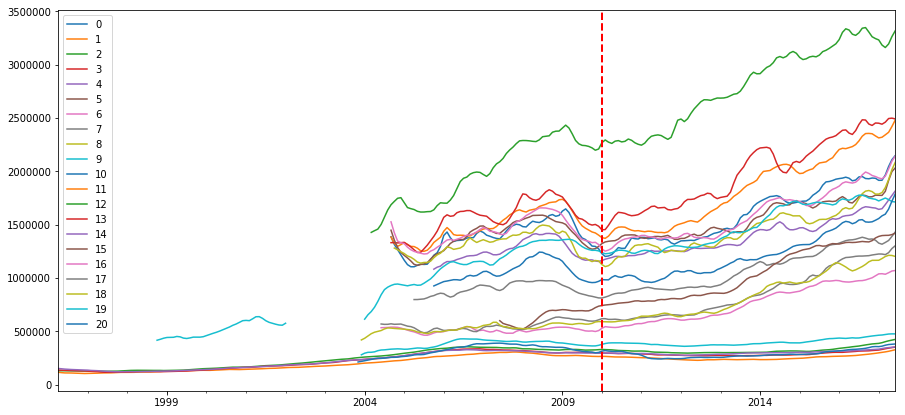

In [38]:
# Visualizing the Time Series for all the 21 Zipcodes

# Changing the Figure Size
from pylab import rcParams
rcParams['figure.figsize'] = 15, 7

# Plotting the Time Series Plot
timeseriesdf.plot()

# marking the Red Dotted line on 2010-01-01
plt.axvline(pd.to_datetime('2010-01-01'), color='r', linestyle='--', lw=2)
plt.legend()
plt.show()


From the plot, there are many irregular patterns and trends along with many missing values before the red vertical line. So the time series data after the vertical line was considered. 

Those Irregular patterns can be attributed to the recession during the period of 2008 and 2009 vitnessing a sudden drop in the costs.

Also after the vertical line, the trend seems to be linearly increasing without any abrupt changes for all the Zipcodes

## Forecasting Current Month Cost

 Sometimes, pyramid doesn't do Auto ARIMA and throws up an error. So in order for it to work efficiently, it is better to have these versions installed

In [39]:
# Checking Versions

import sys; print(sys.version)
import numpy; print(numpy.__version__)
import scipy; print(scipy.__version__)
import sklearn; print(sklearn.__version__)
import pandas; print(pandas.__version__)
import statsmodels; print(statsmodels.__version__)
import pyramid; print(pyramid.__version__)
import pip; print(pip.__version__)

3.6.3 |Anaconda, Inc.| (default, Oct 15 2017, 03:27:45) [MSC v.1900 64 bit (AMD64)]
1.14.2
1.0.0
0.19.1
0.20.3
0.9.0
0.9.0
19.0.3


C:\Users\shari\Anaconda3\lib\site-packages\pyramid\__init__.py:68: UserWarning:


    The 'pyramid' package will be migrating to a new namespace beginning in 
    version 1.0.0: 'pmdarima'. This is due to a package name collision with the
    Pyramid web framework. For more information, see Issue #34:
    
        https://github.com/tgsmith61591/pyramid/issues/34
        
    The package will subsequently be installable via the name 'pmdarima'; the
    only functional change to the user will be the import name. All imports
    from 'pyramid' will change to 'pmdarima'.
    



In [40]:
timeseriesdf.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
1996-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,117500.0,131900.0,138100.0,153000.0,NaN,NaN,NaN,NaN,NaN,NaN
1996-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,113700.0,131900.0,136900.0,149800.0,NaN,NaN,NaN,NaN,NaN,NaN
1996-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,111200.0,131400.0,135900.0,146900.0,NaN,NaN,NaN,NaN,NaN,NaN
1996-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,111100.0,130800.0,134500.0,144800.0,NaN,NaN,NaN,NaN,NaN,NaN
1996-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,110400.0,130200.0,132900.0,143000.0,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
# Filtering out the Timeseries Data From 2010-01-01

timeseriesdf=timeseriesdf[timeseriesdf.index>= '2010-01-01']

In [42]:
# Check for Missing Values

mis_value_percent(timeseriesdf)

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
20    0.0
dtype: float64

In [43]:
timeseriesdf

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
2010-01-01,1227800.0,1378600.0,2268700.0,1451800.0,1163900.0,1323000.0,1271900.0,813300.0,1126000.0,1238600.0,...,266200.0,331100.0,297200.0,296200.0,742800.0,529300.0,619000.0,591300.0,378700.0,315400.0
2010-02-01,1202600.0,1372300.0,2294100.0,1454400.0,1176400.0,1338500.0,1252300.0,821500.0,1107300.0,1227700.0,...,266100.0,330000.0,296500.0,296400.0,747500.0,544800.0,619300.0,589600.0,386600.0,320300.0
2010-03-01,1207100.0,1393100.0,2273600.0,1494500.0,1184500.0,1344600.0,1262300.0,831700.0,1116100.0,1230700.0,...,264700.0,328100.0,296100.0,296900.0,750300.0,540900.0,612700.0,589500.0,391600.0,315800.0
2010-04-01,1220100.0,1430000.0,2261700.0,1542200.0,1192700.0,1348300.0,1279200.0,845100.0,1138500.0,1237300.0,...,262500.0,327200.0,295200.0,296700.0,753800.0,538300.0,612800.0,589300.0,392900.0,314000.0
2010-05-01,1252400.0,1462100.0,2282800.0,1587300.0,1203100.0,1350800.0,1309000.0,854500.0,1175900.0,1250400.0,...,260800.0,324500.0,293600.0,295100.0,758900.0,536800.0,614500.0,590900.0,392900.0,311800.0
2010-06-01,1285700.0,1476800.0,2288000.0,1616000.0,1203500.0,1365100.0,1335300.0,858900.0,1199700.0,1260500.0,...,260700.0,321600.0,292700.0,293800.0,764600.0,539400.0,611300.0,595800.0,393800.0,312600.0
2010-07-01,1278300.0,1479000.0,2275700.0,1612300.0,1200400.0,1390900.0,1353800.0,859200.0,1198700.0,1260700.0,...,260900.0,321000.0,293300.0,294500.0,767300.0,546600.0,605900.0,599000.0,392800.0,313100.0
2010-08-01,1279100.0,1476600.0,2281300.0,1605800.0,1202900.0,1402700.0,1366400.0,863500.0,1205000.0,1257300.0,...,259900.0,320600.0,294400.0,295600.0,769400.0,553100.0,604400.0,600500.0,390800.0,307000.0
2010-09-01,1326700.0,1461200.0,2302800.0,1592500.0,1210100.0,1403700.0,1372100.0,876000.0,1237500.0,1249000.0,...,259200.0,318900.0,294600.0,295300.0,772400.0,553900.0,610100.0,602700.0,390400.0,298200.0
2010-10-01,1376500.0,1448300.0,2290900.0,1584200.0,1210300.0,1404900.0,1381300.0,886100.0,1276200.0,1234500.0,...,258000.0,316500.0,293100.0,292900.0,779100.0,559000.0,618000.0,607600.0,390000.0,293200.0


In [44]:
# Importing the Library for performing the Auto ARIMA:

from pyramid.arima import auto_arima

In [45]:
# Creating a Function to Perform Auto ARIMA

def auto_arima_func(dataset):
    stepwise_model = auto_arima(dataset, start_p=1, start_q=1,
                               max_p=3, max_q=3, m=12,
                                seasonal=True,
                                trace=True,
                               error_action='ignore',  
                               suppress_warnings=True, 
                               stepwise=True)
    # Here it is essential to forecast the values upto 22 periods to obtain the Current Cost (For April 2019)
    # If the Current Month changes if using this in the future, the n_periods value below will change accordingly counting from July 2017.
    
    future_forecast = stepwise_model.predict(n_periods=22)
    return future_forecast

In [46]:
final_forecast=[]

# Here it is required to forecast for 21 Zipcodes. If the number of Zipcodes change in the future, the range in for loop also changes
for i in range(0,21,1):
    final_forecast.append(auto_arima_func(timeseriesdf[i]))

Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 0, 1, 12); AIC=2073.591, BIC=2088.523, Fit time=0.441 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 12); AIC=2024.471, BIC=2029.448, Fit time=0.010 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 0, 12); AIC=2048.337, BIC=2058.291, Fit time=0.291 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 1, 12); AIC=2301.472, BIC=2311.426, Fit time=0.265 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 0, 0, 12); AIC=2026.429, BIC=2033.895, Fit time=0.091 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 1, 12); AIC=2026.435, BIC=2033.901, Fit time=0.031 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 0, 1, 12); AIC=2028.368, BIC=2038.323, Fit time=0.053 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 12); AIC=2046.404, BIC=2053.870, Fit time=0.067 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 12); AIC=2310.301, BIC=2317.767, Fit time=0.067 seconds
Fit ARIMA: order=(1, 1, 1) s

Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 0, 1, 12); AIC=1918.617, BIC=1928.571, Fit time=0.103 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 12); AIC=1965.819, BIC=1973.285, Fit time=0.032 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 12); AIC=1936.399, BIC=1943.865, Fit time=0.074 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 12); AIC=1958.698, BIC=1968.652, Fit time=0.145 seconds
Total fit time: 1.215 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 0, 1, 12); AIC=2138.392, BIC=2153.324, Fit time=0.458 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 12); AIC=2036.481, BIC=2041.458, Fit time=0.013 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 0, 12); AIC=2098.283, BIC=2108.237, Fit time=0.077 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 0, 0, 12); AIC=2038.117, BIC=2045.583, Fit time=0.031 seconds
Fit ARIMA:

Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 0, 0, 12); AIC=1862.165, BIC=1869.631, Fit time=0.180 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 1, 12); AIC=1861.954, BIC=1869.419, Fit time=0.047 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 0, 1, 12); AIC=1862.995, BIC=1872.950, Fit time=0.227 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 12); AIC=1984.309, BIC=1991.775, Fit time=0.033 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 12); AIC=1865.780, BIC=1875.734, Fit time=0.322 seconds
Total fit time: 1.297 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 0, 1, 12); AIC=1860.451, BIC=1875.382, Fit time=0.423 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 12); AIC=1824.686, BIC=1829.664, Fit time=0.014 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 0, 12); AIC=1833.945, BIC=1843.900, Fit time=0.333 seconds
Fit ARIMA:

In [47]:
def join_forecast_values(original_dataset, forecast_dataset):
    
    # Converting the Forecast values to a Dataframe
    forecast = pd.DataFrame(forecast_dataset)
    
    # Changing the Column Names to Date
    forecast.columns= pd.date_range(start= '2017-07-01', end='2019-04-01', freq='MS')
    
    #Concatenating the Forecasted Dataframe to the Original Dataframe
    final_df=pd.concat([original_dataset,forecast], axis=1)
    
    # Converting the final month column to String and then Renaming
    final_df.columns = final_df.columns.astype(str)
    final_df.rename( columns={"2019-04-01 00:00:00": "Current Month Cost"}, inplace=True)
    
    return final_df

In [48]:
# Joining the Forecasted Data to the Actual Group Joined Data created before

final_df=join_forecast_values(df, final_forecast)
final_df

,zipcode,id,scrape_id,host_id,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,...,2018-07-01 00:00:00,2018-08-01 00:00:00,2018-09-01 00:00:00,2018-10-01 00:00:00,2018-11-01 00:00:00,2018-12-01 00:00:00,2019-01-01 00:00:00,2019-02-01 00:00:00,2019-03-01 00:00:00,Current Month Cost
0,10003,9.124661e+06,2.017050e+13,2.496037e+07,NaN,1.646018,1.646018,40.728902,-73.988258,4.566372,...,2.281265e+06,2.291593e+06,2.301921e+06,2.312249e+06,2.322578e+06,2.332906e+06,2.343234e+06,2.353562e+06,2.363890e+06,2.374218e+06
1,10011,9.889107e+06,2.017050e+13,3.005599e+07,NaN,1.448276,1.448276,40.742371,-73.999752,4.517241,...,2.641337e+06,2.653717e+06,2.666097e+06,2.678476e+06,2.690856e+06,2.703236e+06,2.715616e+06,2.727996e+06,2.740375e+06,2.752755e+06
2,10013,1.054726e+07,2.017050e+13,2.783653e+07,NaN,1.412698,1.412698,40.719555,-74.004075,4.281250,...,3.469549e+06,3.481322e+06,3.493096e+06,3.504869e+06,3.516642e+06,3.528415e+06,3.540188e+06,3.551961e+06,3.563734e+06,3.575507e+06
3,10014,8.654217e+06,2.017050e+13,2.054620e+07,NaN,1.537634,1.537634,40.734209,-74.004240,4.344086,...,2.643481e+06,2.655164e+06,2.666847e+06,2.678530e+06,2.690213e+06,2.701897e+06,2.713580e+06,2.725263e+06,2.736946e+06,2.748629e+06
4,10021,1.022891e+07,2.017050e+13,3.568867e+07,NaN,1.526316,1.526316,40.768441,-73.956628,4.263158,...,1.910792e+06,1.918115e+06,1.925437e+06,1.932760e+06,1.940082e+06,1.947404e+06,1.954727e+06,1.962049e+06,1.969372e+06,1.976694e+06
5,10022,9.963782e+06,2.017050e+13,4.129974e+07,NaN,1.394737,1.394737,40.758886,-73.966700,5.447368,...,2.135103e+06,2.143065e+06,2.151027e+06,2.158989e+06,2.166951e+06,2.174912e+06,2.182874e+06,2.190836e+06,2.198798e+06,2.206760e+06
6,10023,8.424752e+06,2.017050e+13,3.053048e+07,NaN,2.888889,2.888889,40.777581,-73.981486,4.666667,...,2.269437e+06,2.279217e+06,2.288997e+06,2.298776e+06,2.308556e+06,2.318336e+06,2.328116e+06,2.337896e+06,2.347675e+06,2.357455e+06
7,10025,7.849437e+06,2.017050e+13,2.567103e+07,NaN,1.571429,1.571429,40.798025,-73.966355,4.821429,...,1.521226e+06,1.528166e+06,1.535107e+06,1.542047e+06,1.548988e+06,1.555928e+06,1.562869e+06,1.569809e+06,1.576749e+06,1.583690e+06
8,10028,1.038785e+07,2.017050e+13,3.790560e+07,NaN,1.375000,1.375000,40.775367,-73.950934,4.281250,...,2.223818e+06,2.234581e+06,2.245344e+06,2.256107e+06,2.266870e+06,2.277633e+06,2.288396e+06,2.299158e+06,2.309921e+06,2.320684e+06
9,10036,8.401201e+06,2.017050e+13,3.853206e+07,NaN,73.500000,73.500000,40.754810,-73.987824,4.750000,...,1.782180e+06,1.787509e+06,1.792838e+06,1.798167e+06,1.803497e+06,1.808826e+06,1.814155e+06,1.819484e+06,1.824813e+06,1.830143e+06


In [49]:
final_df.shape

(21, 317)

### NOTE: Now since the Airbnb data was grouped by Zipcode and averaged, only the variables with numerical
### values will be included in that. The same data was used for Joining with the Zillows Dataset.

### Thus some categorical string variables like "neighbourhood_group_cleansed" are missing here in final_df

In [50]:
# Function to Extract the Neighbours

def extract_neighbours(from_data, to_data):
    
    # Since a particular zipcode has only a particular "neighbourhood_group_cleansed", I am using the .first() method to 
    # extract the neighbourhood and convert them to a Dataframe
    neighbours=from_data.groupby('zipcode').first()['neighbourhood_group_cleansed'].to_frame().reset_index()
    
    # Merging the Extracted data to the to_data
    to_data=to_data.merge(neighbours, on='zipcode')
    
    return(to_data)

In [51]:
# Storing it as "final_df"

final_df= extract_neighbours(airbnb, final_df)
final_df.head()

,zipcode,id,scrape_id,host_id,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,...,2018-08-01 00:00:00,2018-09-01 00:00:00,2018-10-01 00:00:00,2018-11-01 00:00:00,2018-12-01 00:00:00,2019-01-01 00:00:00,2019-02-01 00:00:00,2019-03-01 00:00:00,Current Month Cost,neighbourhood_group_cleansed
0,10003,9.124661e+06,2.017050e+13,2.496037e+07,NaN,1.646018,1.646018,40.728902,-73.988258,4.566372,...,2.291593e+06,2.301921e+06,2.312249e+06,2.322578e+06,2.332906e+06,2.343234e+06,2.353562e+06,2.363890e+06,2.374218e+06,Manhattan
1,10011,9.889107e+06,2.017050e+13,3.005599e+07,NaN,1.448276,1.448276,40.742371,-73.999752,4.517241,...,2.653717e+06,2.666097e+06,2.678476e+06,2.690856e+06,2.703236e+06,2.715616e+06,2.727996e+06,2.740375e+06,2.752755e+06,Manhattan
2,10013,1.054726e+07,2.017050e+13,2.783653e+07,NaN,1.412698,1.412698,40.719555,-74.004075,4.281250,...,3.481322e+06,3.493096e+06,3.504869e+06,3.516642e+06,3.528415e+06,3.540188e+06,3.551961e+06,3.563734e+06,3.575507e+06,Manhattan
3,10014,8.654217e+06,2.017050e+13,2.054620e+07,NaN,1.537634,1.537634,40.734209,-74.004240,4.344086,...,2.655164e+06,2.666847e+06,2.678530e+06,2.690213e+06,2.701897e+06,2.713580e+06,2.725263e+06,2.736946e+06,2.748629e+06,Manhattan
4,10021,1.022891e+07,2.017050e+13,3.568867e+07,NaN,1.526316,1.526316,40.768441,-73.956628,4.263158,...,1.918115e+06,1.925437e+06,1.932760e+06,1.940082e+06,1.947404e+06,1.954727e+06,1.962049e+06,1.969372e+06,1.976694e+06,Manhattan


## Quality Check Phase II

In [52]:
mis_value_percent(final_df)

zipcode                           0.000000
id                                0.000000
scrape_id                         0.000000
host_id                           0.000000
host_acceptance_rate            100.000000
host_listings_count               0.000000
host_total_listings_count         0.000000
latitude                          0.000000
longitude                         0.000000
accommodates                      0.000000
bathrooms                         0.000000
bedrooms                          0.000000
beds                              0.000000
square_feet                      47.619048
price                             0.000000
guests_included                   0.000000
minimum_nights                    0.000000
maximum_nights                    0.000000
has_availability                100.000000
availability_30                   0.000000
availability_60                   0.000000
availability_90                   0.000000
availability_365                  0.000000
number_of_r

### It is to be noted, that the Null values present here were not used for any analysis and thus they were removed instead of imputing with Mean.

In [53]:
final_df=final_df.dropna(axis=1)

In [54]:
mis_value_percent(final_df)

zipcode                           0.0
id                                0.0
scrape_id                         0.0
host_id                           0.0
host_listings_count               0.0
host_total_listings_count         0.0
latitude                          0.0
longitude                         0.0
accommodates                      0.0
bathrooms                         0.0
bedrooms                          0.0
beds                              0.0
price                             0.0
guests_included                   0.0
minimum_nights                    0.0
maximum_nights                    0.0
availability_30                   0.0
availability_60                   0.0
availability_90                   0.0
availability_365                  0.0
number_of_reviews                 0.0
review_scores_rating              0.0
review_scores_accuracy            0.0
calculated_host_listings_count    0.0
RegionID                          0.0
City                              0.0
State       

In [55]:
# Renaming the Price column to Revenue to make it clear

final_df.rename(columns={'price':'Revenue'}, inplace=True)

In [56]:
# Check for duplicate values

final_df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
dtype: bool

### Now the data is clean and there are no more missing data values in the final data

### ---------------------------------------------------------------------------------------------------------------------------------------------------

# Visual Narrative

## Visualizing the Zipcodes in Map

In [57]:

# First an account in Mapbox was created and the Public access token from that was used.

mapbox_access_token = 'pk.eyJ1IjoiaGFyaXNoMjMiLCJhIjoiY2p1N2h5bzliMXVrbDQwb2J3NmF1N3JoMSJ9.7BrKDWLpEdewUnq47GWOKA'

# Inside the Scattermapbox, I have specified the longitude and the latitude column for the map
data = [
    go.Scattermapbox(
        lat=final_df.latitude,
        lon=final_df.longitude,
        mode='markers',
        marker=go.scattermapbox.Marker(
            size=9
        ),text= final_df.zipcode.map(str) + " " + final_df.neighbourhood_group_cleansed # To Display both the Zipcode and Neighbourhood 
        ,
    )
]


# And then the access token defined above was assigned and then the center point of the map is specified
layout = go.Layout(
    autosize=True,
    hovermode='closest',
    mapbox=go.layout.Mapbox(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=go.layout.mapbox.Center(
            lat=40.666,
            lon=-73.98
        ),
        pitch=0,
        zoom=9
    ),
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

##  Preliminary Analysis- Review Analysis

### NOTE: An important thing to note here is the review analysis won't be considered fully because some empty values are filled with their group mean in order to plot the graph. However, this review analysis will taken as a support for our conclusion.

In [58]:
final_df.neighbourhood_group_cleansed.value_counts()

Manhattan        11
Brooklyn          5
Staten Island     4
Queens            1
Name: neighbourhood_group_cleansed, dtype: int64

In [59]:
final_df[final_df['neighbourhood_group_cleansed']=='Manhattan']['review_scores_rating']

0     92.514445
1     93.691141
2     91.690927
3     93.658104
4     93.153286
5     88.233652
6     94.411979
7     92.062500
8     94.200047
9     90.763228
10    91.747068
Name: review_scores_rating, dtype: float64

In [60]:
#Function to Create a Scatterplot for Different Neighbours

def scatterplot(xaxis, yaxis, title):

    data=[]
    neighbours=['Manhattan', 'Brooklyn', 'Staten Island', 'Queens']
    
    # Now looping over the Neighbours List
    for i in neighbours:

        trace = go.Scatter(x= final_df[final_df['neighbourhood_group_cleansed']==i][xaxis],
             y = final_df[final_df['neighbourhood_group_cleansed']==i][yaxis],
             mode= 'markers',
            name= i,
             marker = dict(symbol='circle', size=16),
                           text= final_df[final_df['neighbourhood_group_cleansed']==i]['zipcode'])

        data.append(trace)
    # The above loop will create 4 traces for 4 different neighbourhoods and append it to the data list
    
    layout= go.Layout(title=title,
                     hovermode= 'closest',
                     xaxis= dict(
            title= xaxis),
        yaxis=dict(
            title= yaxis
        ))
    fig =go.Figure(data=data, layout=layout)
    iplot(fig)


In [61]:
scatterplot('review_scores_accuracy','review_scores_rating', 'Review Analysis')

### This is one basic analysis in which shows how accurate are the reviews. We see that Brooklyn in general has more review score accuracy and review rating value. Besides, 10312 and 11434 tops the graph with both high accuracy and 10312 tops with highest rating.

### It is very important to know on an average how many reviews a zipcode gets and analyze the scores further

In [62]:
final_df[['zipcode','review_scores_rating', 'number_of_reviews']]

,zipcode,review_scores_rating,number_of_reviews
0,10003,92.514445,31.292486
1,10011,93.691141,15.945257
2,10013,91.690927,18.906767
3,10014,93.658104,17.774297
4,10021,93.153286,18.810971
5,10022,88.233652,29.905702
6,10023,94.411979,16.877034
7,10025,92.062500,20.180494
8,10028,94.200047,11.622623
9,10036,90.763228,22.604651


In [63]:
# This function is used to create a plot with xaxis, yaxis and a variable whose size will change in the plot depending on the values

def size_scatter(xaxis, yaxis, size):
    
    data=[]
    neighbours=['Manhattan', 'Brooklyn', 'Staten Island', 'Queens']

    for i in neighbours:

        trace = go.Scatter(x= final_df[final_df['neighbourhood_group_cleansed']==i][xaxis],
            y = final_df[final_df['neighbourhood_group_cleansed']==i][yaxis],
            mode='markers',
            marker=dict(
                size=final_df[final_df['neighbourhood_group_cleansed']==i][size]
            ),
            text = "%s"%(size)+'='+ final_df[final_df['neighbourhood_group_cleansed']==i][size].map(str) + '</br> ' + "Zipcode ="+ final_df[final_df['neighbourhood_group_cleansed']==i]['zipcode'].map(str)
        )
        data.append(trace)

    layout= go.Layout(
        title= 'Scatter Plot with Size = %s' %(size),
        hovermode= 'closest',
        xaxis= dict(type='category',
            ticklen= 5,
            zeroline= False,
            gridwidth= 2,
        ),
        yaxis=dict(
            title= '%s'%(yaxis),
            ticklen= 5,
            gridwidth= 2,
        ),
        showlegend= False
    )

    fig = go.Figure(data=data, layout=layout)
    iplot(fig)

In [64]:
size_scatter('neighbourhood_group_cleansed', 'review_scores_rating', 'number_of_reviews' )

### One important trend to note here is that 10306 from Staten Island has both higher number of reviews and higher review score. Also 10312 from Staten Island has higher review score.

### Also 11201 from Brooklyn and 11434 from Queens also show higher number of reviews with higher review scores.

### Also it can be seen that Manhattan on an average receives more reviews for all their zipcodes

### However as discussed at the beginning of this section, review analysis will only be taken as a support.

### -----------------------------------------------------------------------------------------------------------------------------------------------------

## Analysis of Availability

In [65]:
cols(final_df)

['zipcode',
 'id',
 'scrape_id',
 'host_id',
 'host_listings_count',
 'host_total_listings_count',
 'latitude',
 'longitude',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'Revenue',
 'guests_included',
 'minimum_nights',
 'maximum_nights',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'review_scores_rating',
 'review_scores_accuracy',
 'calculated_host_listings_count',
 'RegionID',
 'City',
 'State',
 'Metro',
 'CountyName',
 'SizeRank',
 '2007-06',
 '2007-07',
 '2007-08',
 '2007-09',
 '2007-10',
 '2007-11',
 '2007-12',
 '2008-01',
 '2008-02',
 '2008-03',
 '2008-04',
 '2008-05',
 '2008-06',
 '2008-07',
 '2008-08',
 '2008-09',
 '2008-10',
 '2008-11',
 '2008-12',
 '2009-01',
 '2009-02',
 '2009-03',
 '2009-04',
 '2009-05',
 '2009-06',
 '2009-07',
 '2009-08',
 '2009-09',
 '2009-10',
 '2009-11',
 '2009-12',
 '2010-01',
 '2010-02',
 '2010-03',
 '2010-04',
 '2010-05',
 '2010-06',
 '2010-07',
 '2010-08',
 '2010-09',
 '2010-10',

In [66]:
final_df['accommodates']

0     4.566372
1     4.517241
2     4.281250
3     4.344086
4     4.263158
5     5.447368
6     4.666667
7     4.821429
8     4.281250
9     4.750000
10    4.357143
11    3.500000
12    4.555556
13    5.500000
14    2.000000
15    4.451613
16    4.266129
17    3.983333
18    4.391304
19    4.166667
20    4.000000
Name: accommodates, dtype: float64

In [67]:
# Function to Create Barplots based on the Column Name Input

def barplots_with_columnnames(columnlist, title):
    data=[]
    columns= columnlist
    
    # This loops over the column list which is specified while using the function and create a trace for each of them
    
    for i in columns:
        trace= go.Bar(x= final_df.zipcode.astype(str).tolist(),
                  y= final_df[i],
                  name=i)
        data.append(trace)
    
    # In the Layout, xaxis type='category' will convert the numerical Zipcodes in Xaxis as Categories
    
    layout=go.Layout(title='Bar Plot of %s'%(title) , xaxis=dict(type='category'), yaxis= dict( title='Days Available'))
    fig= go.Figure(data=data, layout=layout)
    iplot(fig)

In [68]:
barplots_with_columnnames(['availability_30','availability_60','availability_90','availability_365'], 'Availability')

### This chart shows that the zipcode 10312 is mostly available for the 30 day, 60 day and 90 day period. A data error is present for its availability for 365 day period. Since it is fully available during the 30,60 and 90 day period, it is not a good property to invest. This substantiates the above statement in the review analysis where 10312 seemes better during the review analysis but it is fully available. This shows that 10312 might have been with 0 reviews and have performed better in review analysis due to the fact that it is replaced with their group mean.

### It is the same with 10304 where the 365 day period is an error. But 10304 has lesser availability during the 30, 60 and 90 day period making it a potential investment. But nothing can be concluded before performing the economic analysis.

### Also 10021 and 10028 seems to have very less availability which could also be considered.

### 11434 from Queens has higher availability and hence it is also not a potential investment

In [69]:
# Using the scatterplot function create above to plot the graph between availability and revenue

scatterplot('availability_90','Revenue', 'Availability-Revenue Analysis')

### This plot shows that houses which charge more have lesser availability compared to the houses which charge less.

### It is pleasing to know that people are ready to spent more on houses.

### One important trend to note here is that the revenue for Brooklyn is only slightly lesser than Manhattan but also has equally low availability as Manhattan. 

In [70]:
# Using the scatterplot function create above to plot the graph between availability and Cost

scatterplot('availability_90','Current Month Cost', 'Availability-Cost Analysis')

###  Similar to the Revenue, the houses with higher cost has lesser availability. It also supports the logic that higher cost houses are more sophisticated and bring better living experience making it higher in demand.

### This shows that people are willing to rent houses which are more expensive. Thus this should be considered while deciding to invest.

### The above two plots also indiate that there could be some correlation between Price and Cost. Let's check that!!

### ------------------------------------------------------------------------------------------------------------------------------------------------------

## Correlation between Revenue, Cost, Reviews and Availability

In [71]:
final_df.head()

,zipcode,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,...,2018-08-01 00:00:00,2018-09-01 00:00:00,2018-10-01 00:00:00,2018-11-01 00:00:00,2018-12-01 00:00:00,2019-01-01 00:00:00,2019-02-01 00:00:00,2019-03-01 00:00:00,Current Month Cost,neighbourhood_group_cleansed
0,10003,9.124661e+06,2.017050e+13,2.496037e+07,1.646018,1.646018,40.728902,-73.988258,4.566372,1.225664,...,2.291593e+06,2.301921e+06,2.312249e+06,2.322578e+06,2.332906e+06,2.343234e+06,2.353562e+06,2.363890e+06,2.374218e+06,Manhattan
1,10011,9.889107e+06,2.017050e+13,3.005599e+07,1.448276,1.448276,40.742371,-73.999752,4.517241,1.337209,...,2.653717e+06,2.666097e+06,2.678476e+06,2.690856e+06,2.703236e+06,2.715616e+06,2.727996e+06,2.740375e+06,2.752755e+06,Manhattan
2,10013,1.054726e+07,2.017050e+13,2.783653e+07,1.412698,1.412698,40.719555,-74.004075,4.281250,1.359375,...,3.481322e+06,3.493096e+06,3.504869e+06,3.516642e+06,3.528415e+06,3.540188e+06,3.551961e+06,3.563734e+06,3.575507e+06,Manhattan
3,10014,8.654217e+06,2.017050e+13,2.054620e+07,1.537634,1.537634,40.734209,-74.004240,4.344086,1.182796,...,2.655164e+06,2.666847e+06,2.678530e+06,2.690213e+06,2.701897e+06,2.713580e+06,2.725263e+06,2.736946e+06,2.748629e+06,Manhattan
4,10021,1.022891e+07,2.017050e+13,3.568867e+07,1.526316,1.526316,40.768441,-73.956628,4.263158,1.052632,...,1.918115e+06,1.925437e+06,1.932760e+06,1.940082e+06,1.947404e+06,1.954727e+06,1.962049e+06,1.969372e+06,1.976694e+06,Manhattan


In [72]:
# For plotting the Correlation, a function to normalize columns was created

def normalize(dataset):
    return((dataset- min(dataset))/ (max(dataset)- min(dataset)))

Since all the variables are in different units, it will be essential to conver them to a range between 0-1 and then compare

In [73]:
# Normalizing the Revenue, Cost and Review:

normalized_revenue= normalize(final_df['Revenue'])
normalized_cost= normalize(final_df['Current Month Cost'])
normalized_review= normalize(final_df['review_scores_rating'])
normalized_availability= normalize(final_df['availability_90'])
scatter_df = pd.concat([normalized_revenue, normalized_cost, normalized_review,normalized_availability], axis=1)

In [74]:
# plotting the Scatterplot Matrix

import plotly.figure_factory as ff

# Here the Index is arranged so that the scale on the side starts from 1 and ends at 21 instead of the default (0 to 21)
scatter_df['index'] = np.arange(1,len(scatter_df)+1)


fig = ff.create_scatterplotmatrix(scatter_df, diag ='box', index = 'index' , colormap ='Portland',
                                 colormap_type = 'seq', height = 900, width = 900)
iplot(fig)

### There seems to be a good positive correlation between the Cost and the Revenue indicating that when 
### the cost is high, the price host charge(revenue) is also high which is logical.

### There is no real correlation between the availability- review scores within each other and also among other variables 

### ----------------------------------------------------------------------------------------------------------------------------------------

## Distribution of Revenue and Cost

In [75]:
# Function to Create Violin plots

def violinplot(columnname):
    data=[]
    neighbours=['Manhattan', 'Brooklyn', 'Staten Island', 'Queens']
    
    # Loop to create 4 traces to plot 4 violin plots each for each neighbour.
    for i in neighbours:
        trace = {  "type": 'violin',
                    "y": final_df[final_df['neighbourhood_group_cleansed']==i][columnname],
                    "name": i,
                    "box": {
                        "visible": True
                    },
                    "meanline": {
                        "visible": True
                    }
        }

        data.append(trace)

    fig = {
        "data": data,
        "layout" : {
            "title": "Violin plot of %s" %columnname,
            "yaxis": {
                "zeroline": False,
            }
        }
    }

    iplot(fig)

In [76]:
# Violin Plots of Revenue:

violinplot('Revenue')

### The above plot shows that Manhattan has a higher revenue in general and it is followed by Brooklyn, Staten Island and Queens

### Also the revenue range is very broad in case of Manhattan and Staten Island. For queens, since it has just a single zipcode, it shows a line.

In [77]:
# Violin plots of Cost:

violinplot('Current Month Cost')

### In the Cost plot, it follow the same trend where Manhattan is the most expensive, and it is followed by Brooklyn, Staten island and Queens

### But the most important thing to note here is, the Cost difference between Brooklyn and Staten Island is very high which makes Staten Island to have a lower Breakeven Period and it is discussed in detail in further analyses below

### The distribution of cost for Manhattan is also wide similar to its revenue distribution.

### The distribution of cost for Staten Island is very narrow compared to its revenue. This shows that people are buying properties within a narrow range of cost and leasing in Airbnb for a wide range of price. It is found below on further analyses of the prices they are charging for the lease.

### ----------------------------------------------------------------------------------------------------------------------------------------------------

## Revenue- Cost Analysis

In [78]:
# Scatterplot between Revenue and Cost and using the function create above to plot the graph

scatterplot('Revenue','Current Month Cost', 'Revenue-Cost Analysis')

### The Zipcode 10036 produces more revenue in the longer run and it can also be attributed to the fact that it is located near the Times Square(visible when zoomed in the above map) which has more demand and thus more revenue charged.

### The property 10025 from Manhattan also seems to be great performer in the longer run considering its revenue and lower cost.

### Also 10312 seems to be good place considering its lower cost and comparitively higher revenue. But again, since it has more availability, it is not advisable to invest in them.

### ---------------------------------------------------------------------------------------------------------------------------------------------------

## Break Even Analysis

### Expected Return = Revenue × Time × Occupancy Rate

### Breakeven Period = Total Cost / Expected Return

### Occupancy Rate= 0.75 (Assumption Given)

### Time= 365 days

### So different columns separately for Expected Return, and BreakEven Period was created

In [79]:
final_df.head()

,zipcode,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,...,2018-08-01 00:00:00,2018-09-01 00:00:00,2018-10-01 00:00:00,2018-11-01 00:00:00,2018-12-01 00:00:00,2019-01-01 00:00:00,2019-02-01 00:00:00,2019-03-01 00:00:00,Current Month Cost,neighbourhood_group_cleansed
0,10003,9.124661e+06,2.017050e+13,2.496037e+07,1.646018,1.646018,40.728902,-73.988258,4.566372,1.225664,...,2.291593e+06,2.301921e+06,2.312249e+06,2.322578e+06,2.332906e+06,2.343234e+06,2.353562e+06,2.363890e+06,2.374218e+06,Manhattan
1,10011,9.889107e+06,2.017050e+13,3.005599e+07,1.448276,1.448276,40.742371,-73.999752,4.517241,1.337209,...,2.653717e+06,2.666097e+06,2.678476e+06,2.690856e+06,2.703236e+06,2.715616e+06,2.727996e+06,2.740375e+06,2.752755e+06,Manhattan
2,10013,1.054726e+07,2.017050e+13,2.783653e+07,1.412698,1.412698,40.719555,-74.004075,4.281250,1.359375,...,3.481322e+06,3.493096e+06,3.504869e+06,3.516642e+06,3.528415e+06,3.540188e+06,3.551961e+06,3.563734e+06,3.575507e+06,Manhattan
3,10014,8.654217e+06,2.017050e+13,2.054620e+07,1.537634,1.537634,40.734209,-74.004240,4.344086,1.182796,...,2.655164e+06,2.666847e+06,2.678530e+06,2.690213e+06,2.701897e+06,2.713580e+06,2.725263e+06,2.736946e+06,2.748629e+06,Manhattan
4,10021,1.022891e+07,2.017050e+13,3.568867e+07,1.526316,1.526316,40.768441,-73.956628,4.263158,1.052632,...,1.918115e+06,1.925437e+06,1.932760e+06,1.940082e+06,1.947404e+06,1.954727e+06,1.962049e+06,1.969372e+06,1.976694e+06,Manhattan


In [80]:
cols(final_df)

['zipcode',
 'id',
 'scrape_id',
 'host_id',
 'host_listings_count',
 'host_total_listings_count',
 'latitude',
 'longitude',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'Revenue',
 'guests_included',
 'minimum_nights',
 'maximum_nights',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'review_scores_rating',
 'review_scores_accuracy',
 'calculated_host_listings_count',
 'RegionID',
 'City',
 'State',
 'Metro',
 'CountyName',
 'SizeRank',
 '2007-06',
 '2007-07',
 '2007-08',
 '2007-09',
 '2007-10',
 '2007-11',
 '2007-12',
 '2008-01',
 '2008-02',
 '2008-03',
 '2008-04',
 '2008-05',
 '2008-06',
 '2008-07',
 '2008-08',
 '2008-09',
 '2008-10',
 '2008-11',
 '2008-12',
 '2009-01',
 '2009-02',
 '2009-03',
 '2009-04',
 '2009-05',
 '2009-06',
 '2009-07',
 '2009-08',
 '2009-09',
 '2009-10',
 '2009-11',
 '2009-12',
 '2010-01',
 '2010-02',
 '2010-03',
 '2010-04',
 '2010-05',
 '2010-06',
 '2010-07',
 '2010-08',
 '2010-09',
 '2010-10',

### KPIs created for Breakeven period Calculation:

In [81]:
# Function to create KPIs:

def breakeven_calc(dataset):
    
    #Calculating all the KPIs for Breakeven Analysis
    dataset['Expected Return']= dataset['Revenue'] * 365 * 0.75
    dataset['Breakeven Period']= dataset['Current Month Cost']/dataset['Expected Return'] 
    
    return dataset


In [82]:
final_df=breakeven_calc(final_df)

In [83]:
final_df

,zipcode,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,...,2018-10-01 00:00:00,2018-11-01 00:00:00,2018-12-01 00:00:00,2019-01-01 00:00:00,2019-02-01 00:00:00,2019-03-01 00:00:00,Current Month Cost,neighbourhood_group_cleansed,Expected Return,Breakeven Period
0,10003,9.124661e+06,2.017050e+13,2.496037e+07,1.646018,1.646018,40.728902,-73.988258,4.566372,1.225664,...,2.312249e+06,2.322578e+06,2.332906e+06,2.343234e+06,2.353562e+06,2.363890e+06,2.374218e+06,Manhattan,85085.376106,27.903949
1,10011,9.889107e+06,2.017050e+13,3.005599e+07,1.448276,1.448276,40.742371,-73.999752,4.517241,1.337209,...,2.678476e+06,2.690856e+06,2.703236e+06,2.715616e+06,2.727996e+06,2.740375e+06,2.752755e+06,Manhattan,99531.724138,27.657062
2,10013,1.054726e+07,2.017050e+13,2.783653e+07,1.412698,1.412698,40.719555,-74.004075,4.281250,1.359375,...,3.504869e+06,3.516642e+06,3.528415e+06,3.540188e+06,3.551961e+06,3.563734e+06,3.575507e+06,Manhattan,106719.726562,33.503710
3,10014,8.654217e+06,2.017050e+13,2.054620e+07,1.537634,1.537634,40.734209,-74.004240,4.344086,1.182796,...,2.678530e+06,2.690213e+06,2.701897e+06,2.713580e+06,2.725263e+06,2.736946e+06,2.748629e+06,Manhattan,89048.225806,30.866749
4,10021,1.022891e+07,2.017050e+13,3.568867e+07,1.526316,1.526316,40.768441,-73.956628,4.263158,1.052632,...,1.932760e+06,1.940082e+06,1.947404e+06,1.954727e+06,1.962049e+06,1.969372e+06,1.976694e+06,Manhattan,74964.276316,26.368485
5,10022,9.963782e+06,2.017050e+13,4.129974e+07,1.394737,1.394737,40.758886,-73.966700,5.447368,1.276316,...,2.158989e+06,2.166951e+06,2.174912e+06,2.182874e+06,2.190836e+06,2.198798e+06,2.206760e+06,Manhattan,100545.493421,21.947871
6,10023,8.424752e+06,2.017050e+13,3.053048e+07,2.888889,2.888889,40.777581,-73.981486,4.666667,1.349206,...,2.298776e+06,2.308556e+06,2.318336e+06,2.328116e+06,2.337896e+06,2.347675e+06,2.357455e+06,Manhattan,77936.190476,30.248528
7,10025,7.849437e+06,2.017050e+13,2.567103e+07,1.571429,1.571429,40.798025,-73.966355,4.821429,1.232143,...,1.542047e+06,1.548988e+06,1.555928e+06,1.562869e+06,1.569809e+06,1.576749e+06,1.583690e+06,Manhattan,78292.500000,20.227862
8,10028,1.038785e+07,2.017050e+13,3.790560e+07,1.375000,1.375000,40.775367,-73.950934,4.281250,1.258065,...,2.256107e+06,2.266870e+06,2.277633e+06,2.288396e+06,2.299158e+06,2.309921e+06,2.320684e+06,Manhattan,74040.820312,31.343308
9,10036,8.401201e+06,2.017050e+13,3.853206e+07,73.500000,73.500000,40.754810,-73.987824,4.750000,1.416667,...,1.798167e+06,1.803497e+06,1.808826e+06,1.814155e+06,1.819484e+06,1.824813e+06,1.830143e+06,Manhattan,122001.250000,15.001016


In [84]:
# Function to Create Barplots based on the Column Name Input

def barplots_with_neighbourhoods(xaxis, yaxis, title):
    data=[]
    neighbours=['Manhattan', 'Brooklyn', 'Staten Island', 'Queens']

    for i in neighbours:
        trace= go.Bar(x= final_df[final_df['neighbourhood_group_cleansed']==i][xaxis],
                  y= final_df[final_df['neighbourhood_group_cleansed']==i][yaxis],
                  name=i)
        data.append(trace)
    
    # In the Layout, xaxis type='category' will convert the numerical Zipcodes in Xaxis as Categories
    
    layout=go.Layout(title='Bar Plot of %s'%(title) , xaxis=dict(type='category'), yaxis= dict( title='Breakeven Period(in years)'))
    fig= go.Figure(data=data, layout=layout)
    iplot(fig)

In [85]:
# Using the above created function to plot the bar chart

barplots_with_neighbourhoods('zipcode','Breakeven Period', 'Breakeven Period for Zipcodes')

### In general, the neighbourhood "Staten Island" has a lower break even period

### From the zipcodes analyzed, 10312 has the least breakdown period considering its ability to make profit quicker. But from the availability analyses conducted above, it is not rented even once. So it should not be considered for investing

### Off the remaining, 10036 shows a promising trend with lower breakeven period. 

### The breakeven period for Brooklyn is also low and in that 11234 has a lower breakeven priod but it has higher availability. So it is not a potential investment.

### ----------------------------------------------------------------------------------------------------------------------------------------------

## 3-D Scatter Plot Between Revenue, Cost and Breakeven period

In [86]:
# Function to Create a 3-D Scatter plot:s

def threedscatterplot(xaxis, yaxis, zaxis):
    data=[]
    neighbours=['Manhattan', 'Brooklyn', 'Staten Island', 'Queens']

    for i in neighbours:
        trace = go.Scatter3d(
            x=final_df[final_df['neighbourhood_group_cleansed']==i][xaxis],
            y=final_df[final_df['neighbourhood_group_cleansed']==i][yaxis],
            z=final_df[final_df['neighbourhood_group_cleansed']==i][zaxis],
            mode='markers',
            name=i,
            marker=dict(
                size=10), 
            text= final_df[final_df['neighbourhood_group_cleansed']==i]['zipcode']
        )
        data.append(trace)
    
    layout= go.Layout(title='3D ScatterPlot Between X= %s, y= %s, and z= %s' %(xaxis,yaxis,zaxis),
                     hovermode= 'closest')
    
    fig = go.Figure(data=data, layout=layout)
    iplot(fig)

In [87]:
# threedscatterplot(xaxis, yaxis, zaxis)
threedscatterplot('Revenue', 'Current Month Cost', 'Breakeven Period')

### From this plot, it is evident that 10036 has a higher x-value (Revenue), lower y- value( cost) and lower z-value (Breakeven Period). Also it had higher revenue- lower cost, located near the Times Square. So it  could be a potential Investment.

### Also 10025 has lower breakeven period with lower cost than most.

### ----------------------------------------------------------------------------------------------------------------------------------------------------

## Conclusion:

### * If the Company wants to make profits sooner and willing to spend lesser, it is better to go with 10025, 11215, 11231 and 11201. It has lesser availability, lesser cost and lesser breakeven periods. 

### *  If the Company wants to make profits sooner and ready to invest good amount of money, then it is better to invest in 10036 and 10022. This also is the best option in the longer run. 

### These are the suggestions which could be drawn from the analysis and the final decisions should be made depending on the objective which the company is trying to achieve.